In [1]:
from eagles.Supervised.tuner import SupervisedTuner
import pandas as pd

In [2]:
from eagles.data_sets import data_loader as dl

iris = dl.load_iris()
iris.shape

(150, 5)

In [3]:
species = pd.get_dummies(iris['species'])
iris = pd.concat([iris, species], axis=1)
iris.drop(['species'], axis=1, inplace=True)

fts = ['sepal_width', 'petal_length', 'petal_width', 'setosa', 'versicolor', 'virginica']

Performing CV Runs: 5
Finished cv run: 1 time: 0.0174
Finished cv run: 2 time: 0.011
Finished cv run: 3 time: 0.0088
Finished cv run: 4 time: 0.0075
Finished cv run: 5 time: 0.0076


,cv run,rmse_scores,mae_scores
0,1,0.291801,0.226453
1,2,0.295828,0.217582
2,3,0.338605,0.270146
3,4,0.315532,0.258746
4,5,0.296110,0.260238
5,mean,0.307575,0.246633
6,std,0.017575,0.020668


Final cv train test split
rmse score: 0.2961
mae score: 0.2602


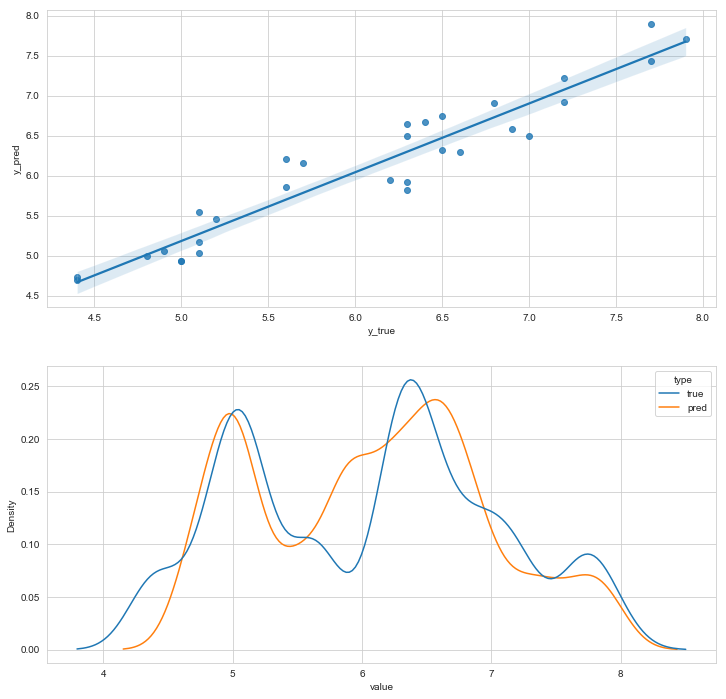

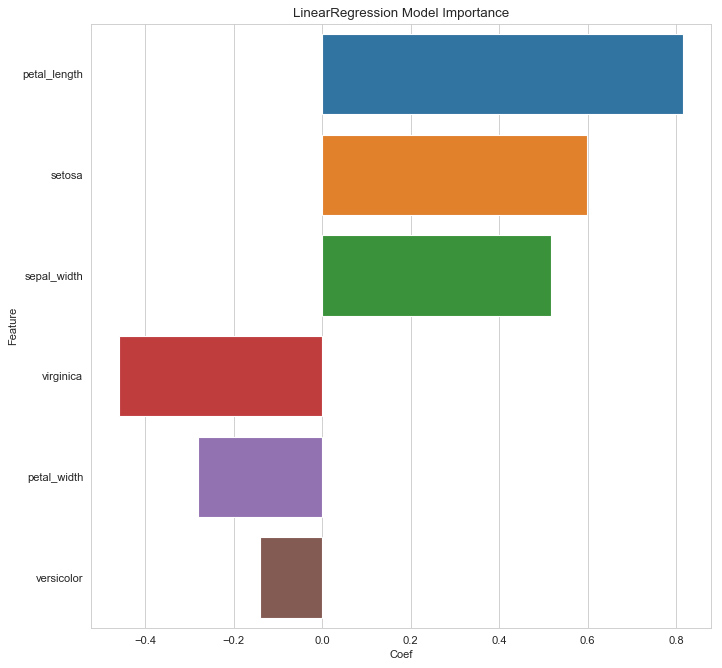

In [4]:
tuner = SupervisedTuner(
    problem_type='regress',
    eval_metrics=["rmse", "mae"],
    num_cv=5,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["sepal_length"],
    model="linear",
    params={},
    pipe=None,
    scale=None,
    select_features=None,
)

## ExtraTrees Regressor with Standard Scaling

Performing CV Runs: 5
Finished cv run: 1 time: 0.21
Finished cv run: 2 time: 0.165
Finished cv run: 3 time: 0.1823
Finished cv run: 4 time: 0.1777
Finished cv run: 5 time: 0.164


,cv run,rmse_scores,mae_scores
0,1,0.336235,0.273150
1,2,0.254364,0.190850
2,3,0.390457,0.288817
3,4,0.380696,0.308800
4,5,0.365622,0.308400
5,mean,0.345475,0.274003
6,std,0.049105,0.043655


Final cv train test split
rmse score: 0.3656
mae score: 0.3084


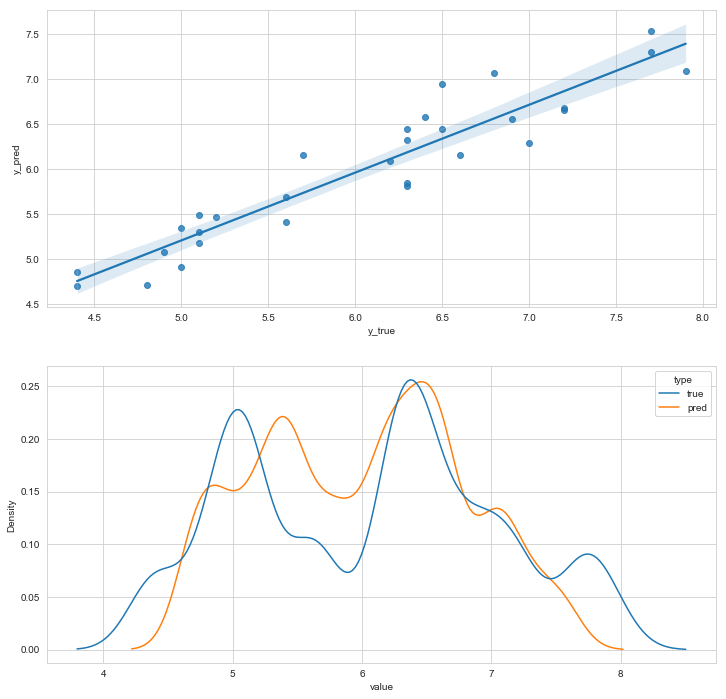

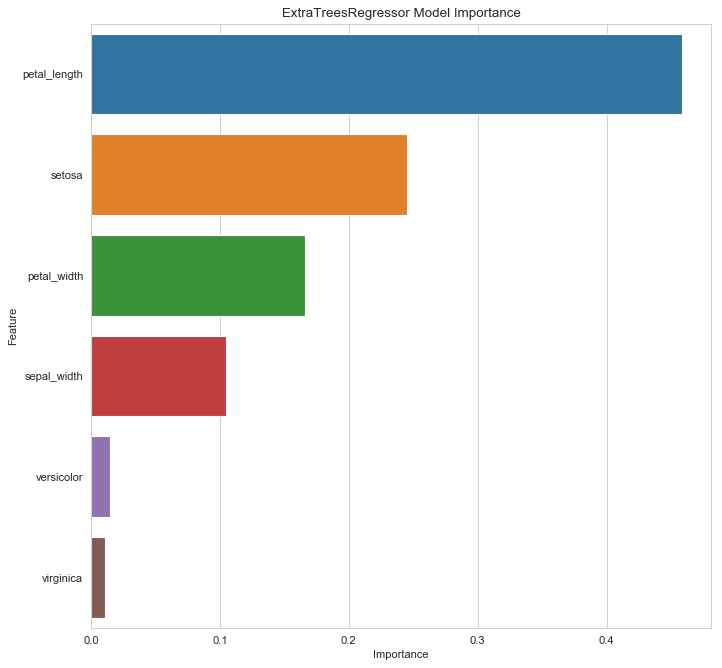

In [5]:
tuner = SupervisedTuner(
    problem_type='regress',
    eval_metrics=["rmse", "mae"],
    num_cv=5,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["sepal_length"],
    model="et_regress",
    params={},
    pipe=None,
    scale="standard",
    select_features=None,
)

## Voting Regressor with Select Features

Performing CV Runs: 3
Finished cv run: 1 time: 0.2295
Finished cv run: 2 time: 0.2018
Finished cv run: 3 time: 0.2093


,cv run,rmse_scores,mae_scores
0,1,0.377056,0.286227
1,2,0.347450,0.272550
2,3,0.381842,0.311751
3,mean,0.368783,0.290176
4,std,0.015211,0.016245


Final cv train test split
rmse score: 0.3818
mae score: 0.3118


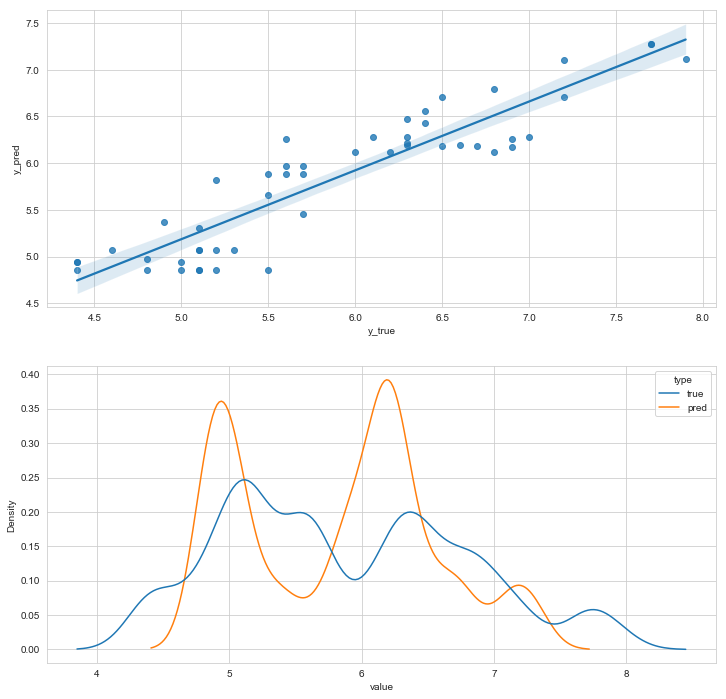

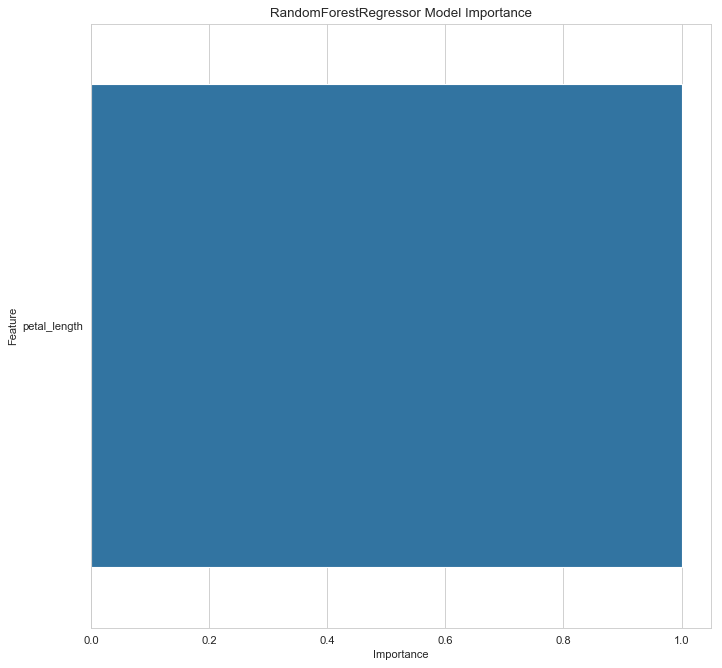

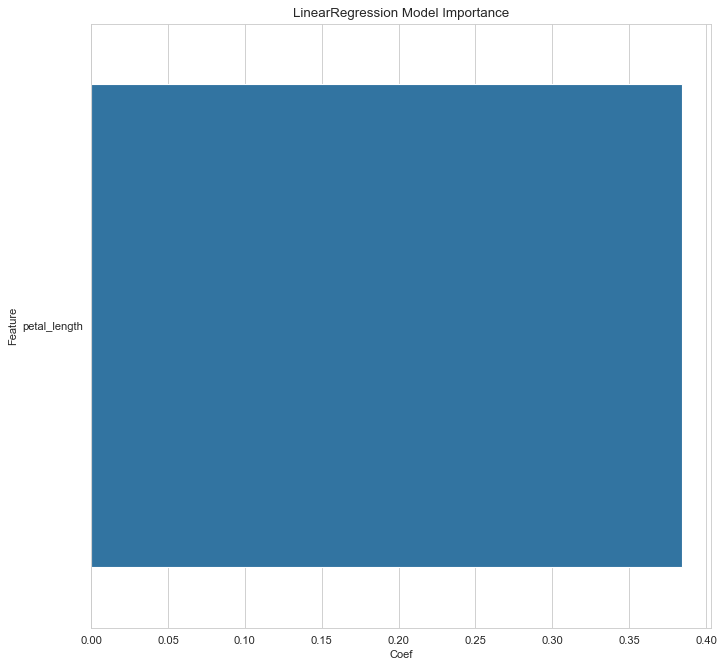

In [11]:
tuner = SupervisedTuner(
    problem_type='regress',
    eval_metrics=["rmse", "mae"],
    num_cv=3,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["sepal_length"],
    model="vc_regress",
    params={},
    pipe=None,
    scale=None,
    select_features="select_from_model",
)